# Fake News Detection Using Machine Learning
#### Project Goal:
The goal of this project is to build a machine learning model that can accurately classify news articles as Real or Fake. By using Natural Language Processing (NLP) techniques and various machine learning algorithms, the project aims to detect fake news based on its textual content. The model is trained and evaluated using multiple classifiers, with the best-performing model being selected for deployment. 

## 1. **Importing Required Libraries**
Import necessary libraries for data handling, visualization, natural language processing (NLP), machine learning, and model evaluation.


In [3]:

# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import joblib
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc



## 2. Data Collection & Preparation
Load the true and fake news datasets.
Label the news as Real (1) and Fake (0).
Combine the datasets and remove unnecessary columns for further processing.

In [5]:
# Load True and Fake News datasets
df_true = pd.read_csv(r"C:\Users\sowjanya\Desktop\Data Science Projects\Fake News Detection\true.csv")
df_fake = pd.read_csv(r"C:\Users\sowjanya\Desktop\Data Science Projects\Fake News Detection\fake.csv")

# Add labels (1 = Real, 0 = Fake)
df_true['label'] = 1
df_fake['label'] = 0

# Combine datasets
df = pd.concat([df_true, df_fake], axis=0).reset_index(drop=True)

# Keep only relevant columns
df = df[['text', 'label']]

# Display initial info
print(df.head())
print(df.info())

# Checking for missing values
print("Missing Values:\n", df.isnull().sum())

# Remove duplicate entries
df.drop_duplicates(inplace=True)


                                                text  label
0  WASHINGTON (Reuters) - The head of a conservat...      1
1  WASHINGTON (Reuters) - Transgender people will...      1
2  WASHINGTON (Reuters) - The special counsel inv...      1
3  WASHINGTON (Reuters) - Trump campaign adviser ...      1
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB
None
Missing Values:
 text     0
label    0
dtype: int64


## 3. Exploratory Data Analysis (EDA)
Visualize the distribution of labels and create word clouds for fake and real news.

C:\Users\sowjanya\AppData\Local\Temp\ipykernel_18336\948281139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette=['red', 'green'])


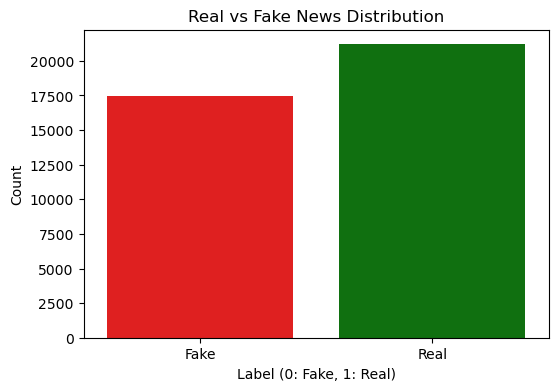

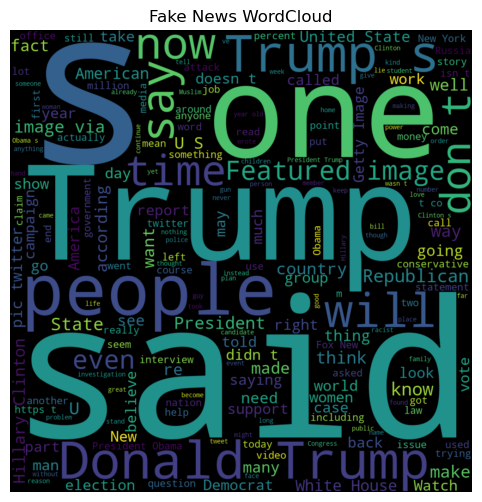

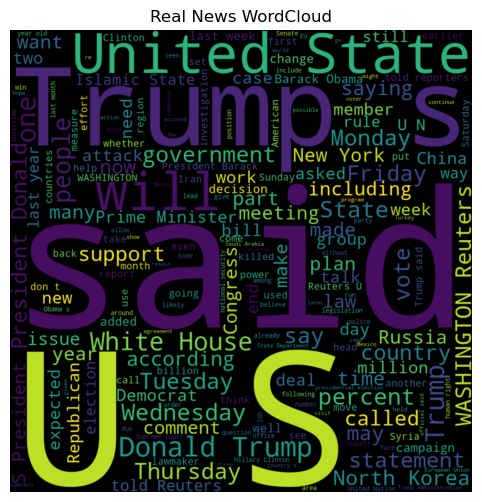

In [7]:
# Distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x=df['label'], palette=['red', 'green'])
plt.title("Real vs Fake News Distribution")
plt.xlabel("Label (0: Fake, 1: Real)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'])
plt.show()

# WordClouds for Fake and Real News
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='black')

# Fake News WordCloud
fake_wc = wc.generate(df[df['label'] == 0]['text'].str.cat(sep=" "))
plt.figure(figsize=(10, 6))
plt.imshow(fake_wc, interpolation='bilinear')
plt.title('Fake News WordCloud')
plt.axis('off')
plt.show()

# Real News WordCloud
real_wc = wc.generate(df[df['label'] == 1]['text'].str.cat(sep=" "))
plt.figure(figsize=(10, 6))
plt.imshow(real_wc, interpolation='bilinear')
plt.title('Real News WordCloud')
plt.axis('off')
plt.show()


## 4. Text Preprocessing & Feature Engineering
Clean the text data by removing special characters and stop words.
Tokenize the text and apply stemming to reduce words to their root form.
Convert the cleaned text to numerical vectors using TF-IDF.

In [9]:
# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
ps = PorterStemmer()

# Function to clean and preprocess text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = word_tokenize(text)  # Tokenization
    text = [ps.stem(word) for word in text if word not in stopwords.words('english') and word not in string.punctuation]
    return " ".join(text)

# Apply text preprocessing
df['cleaned_text'] = df['text'].apply(clean_text)

# Convert text data to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sowjanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sowjanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 5. Model Selection & Training
Train multiple models (Naive Bayes, Logistic Regression, Random Forest) and evaluate them on the test set.
Record the performance of each model based on accuracy, precision, recall, and F1-score.

In [11]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    
    print(f"\nModel: {model_name}")
    print(classification_report(y_test, y_pred))

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
print("\nModel Performance Comparison:\n", results_df)



Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3486
           1       0.94      0.94      0.94      4244

    accuracy                           0.93      7730
   macro avg       0.93      0.93      0.93      7730
weighted avg       0.93      0.93      0.93      7730


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3486
           1       0.98      0.99      0.99      4244

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730


Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3486
           1       0.99      1.00      1.00      4244

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weig

## 6. Model Evaluation & ROC Curve Comparison
Plot ROC curves for each model and compare their performance based on the AUC (Area Under the Curve) score.

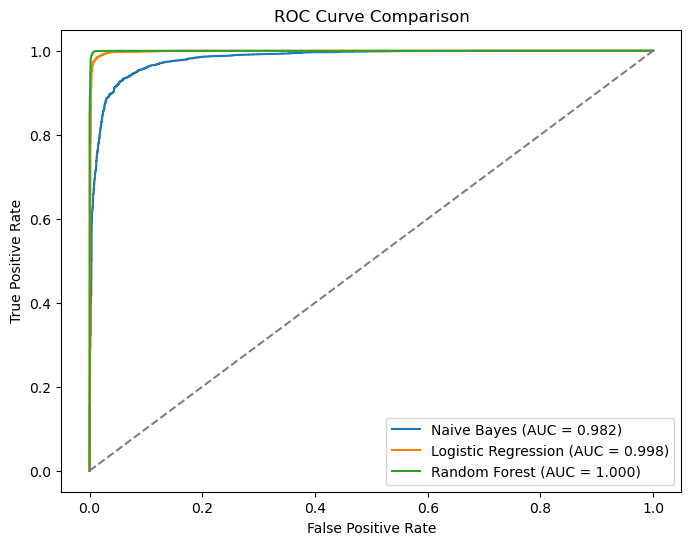

In [13]:
plt.figure(figsize=(8, 6))

# Plot ROC Curves for each model
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.3f})")

# Plot the random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


## 7. Final Model Selection & Deployment
Select the best-performing model based on F1-score.
Save the selected model and TF-IDF vectorizer for future use.

In [15]:
# Select the best model based on F1-score
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

# Save the best model
model_path = r"C:\Users\sowjanya\Desktop\Data Science Projects\Fake News Detection\models\fake_news_model.pkl"
joblib.dump(best_model, model_path)

# Save the vectorizer
vectorizer_path = r"C:\Users\sowjanya\Desktop\Data Science Projects\Fake News Detection\models\tfidf_vectorizer.pkl"
joblib.dump(vectorizer, vectorizer_path)

print(f"\nBest Model for Deployment: {best_model_name}")
print(f"Model saved at: {model_path}")
print(f"Vectorizer saved at: {vectorizer_path}")



Best Model for Deployment: Random Forest
Model saved at: C:\Users\sowjanya\Desktop\Data Science Projects\Fake News Detection\models\fake_news_model.pkl
Vectorizer saved at: C:\Users\sowjanya\Desktop\Data Science Projects\Fake News Detection\models\tfidf_vectorizer.pkl
